<a href="https://colab.research.google.com/github/kirujaglor/Elections-Prediction-Model/blob/main/ElectionsPrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Columns based on the context of predicting the likelihood of a voter supporting a particular candidate:

#Facebook Likes: Number of likes on Facebook related to political content.
#Facebook Comments: Number of comments on political posts.
#Twitter Retweets: Number of retweets of political tweets.
#Instagram likes: Number of likes on political content on Instagram.
#Instagram Comments: Number of comments on political posts on Instagram.
#Sentiment Score: Score indicating the sentiment of social media posts
#Follower Count: Number of followers on social media platforms.
#Friend Count: Number of friends or accounts followed on social media platforms.
#Posting Frequency: Frequency of posting political content over a specific period.
#Age: Age of the voter.
#Gender: Gender of the voter.(1-Female 2-Male)
#Party_Affiliation: Voters’ registered political party affiliation.(1-party-affiliated 2-no party-affiliated)
#Support_Candidate: The likelihood of supporting a particular candidate.(1-likelihood 2-no likelihood)


#Loading voters classification determinant dataset
import pandas as pd
kiruja = pd.read_csv('/content/VotersClassificationDeterminant3.csv')
print("Shape of the dataset:", kiruja.shape)
kiruja.head(10)

Shape of the dataset: (12, 13)


,Facebook likes,Facebook Shares,Follower Count,Friends Count,Twitter Retweets,Insta Likes,Insta Comments,Sentiment Score,Posting Frequency,Age,Gender,Party Affiliation,Supporting Candidate
0,500,50,300,2000,30,50,40,7,6,25,1,1,1
1,400,35,325,1500,25,45,29,9,8,38,2,2,2
2,125,17,100,600,19,28,17,5,7,29,1,2,2
3,50,26,43,459,5,10,5,3,4,46,2,1,1
4,1000,700,856,3000,58,79,50,8,9,37,1,2,2
5,459,236,330,700,28,48,45,7,5,20,2,1,1
6,5000,359,900,3500,56,67,58,9,2,18,1,2,2
7,23,13,7,165,3,13,5,3,1,49,1,1,1
8,39,20,57,100,4,2,2,5,5,32,2,2,2
9,10,1,2,324,2,2,7,3,6,50,1,1,1


In [3]:

#Splitting data set into training and testing set
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
kiruja = pd.read_csv('/content/VotersClassificationDeterminant3.csv')
X = kiruja.drop('Supporting Candidate', axis=1)
y = kiruja['Supporting Candidate']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=35)


In [6]:


#Building the decision tree model
glo = DecisionTreeClassifier(criterion='entropy', random_state=35)
glo.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=35)

In [7]:

#Using trained model to make decision on test set
y_pred = glo.predict(X_test)
print(y_pred)

[2 2 2]


In [8]:

#Evaluating the model
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)
print(f"Accuracy: {accuracy:.2f}")
report = classification_report(y_test, y_pred)
print("Classification Report:")
print(report)
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

Accuracy: 1.0
Accuracy: 1.00
Classification Report:
              precision    recall  f1-score   support

           2       1.00      1.00      1.00         3

    accuracy                           1.00         3
   macro avg       1.00      1.00      1.00         3
weighted avg       1.00      1.00      1.00         3

Confusion Matrix:
[[3]]


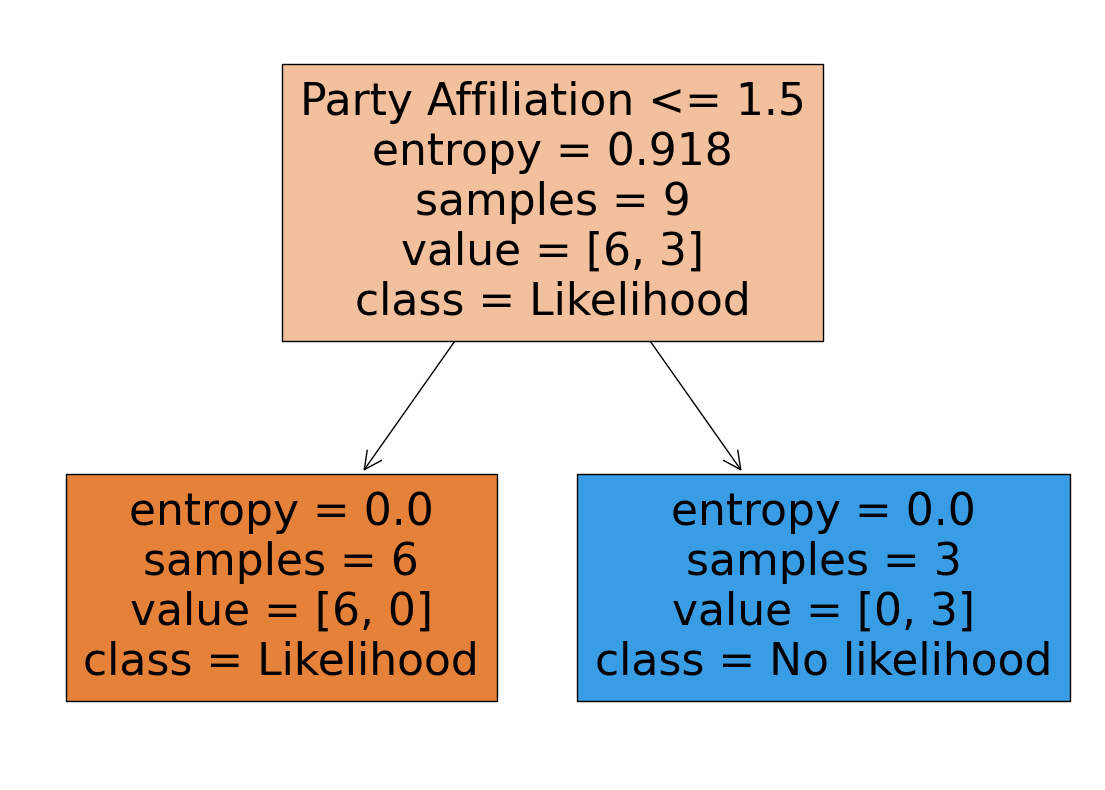

In [9]:

#Visualizing decision tree
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
plt.figure(figsize=(14, 10))
plot_tree(glo, filled=True, feature_names=X.columns, class_names=["Likelihood", "No likelihood"])
plt.show()

In [12]:

#Saving the model
import joblib
glo = DecisionTreeClassifier(random_state=35)
glo.fit(X_train, y_train)
joblib.dump(glo, 'decision_tree_model.pkl')

['decision_tree_model.pkl']

In [16]:

#Loading model and making prediction using my data
import joblib
import pandas as pd
loaded_model = joblib.load('decision_tree_model.pkl')
new_data = pd.DataFrame({
    'Facebook likes':	[34, 67, 9, 204],
    'Facebook Shares' : [12, 78, 789, 67],
    'Follower Count' : [234, 6, 78, 32],
    'Friends Count' : [23, 678, 87, 30],
    'Twitter Retweets' : [2, 90, 36, 21],
    'Insta Likes' : [23, 59, 90, 2],
    'Insta Comments' : [19, 47, 109, 43],
    'Sentiment Score' : [4, 9, 10, 1],
    'Posting Frequency' : [3, 9, 7, 10],
    'Age' : [35, 21, 67, 28],
    'Gender' : [1, 2, 1, 2],
    'Party Affiliation' : [1, 2, 1, 1]
})

predictions = loaded_model.predict(new_data)
supporting_candidate = {1: "1-Likelihood", 2: "2-No likelihood"}
for i, prediction in enumerate(predictions):
 label= supporting_candidate[prediction]
print(f"Data {i+1}: Predicted Outcome - {label}")



Data 4: Predicted Outcome - 1-Likelihood
